In [ ]:
!pip install torch


     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     ---------------------------------------- 0.3/172.4 MB 7.9 MB/s eta 0:00:22
     ---------------------------------------- 0.6/172.4 MB 7.4 MB/s eta 0:00:24
     ---------------------------------------- 1.1/172.4 MB 8.7 MB/s eta 0:00:20
     ---------------------------------------- 1.5/172.4 MB 8.8 MB/s eta 0:00:20
     ---------------------------------------- 2.1/172.4 MB 9.5 MB/s eta 0:00:18
      -------------------------------------- 2.5/172.4 MB 10.1 MB/s eta 0:00:17
      -------------------------------------- 3.1/172.4 MB 10.6 MB/s eta 0:00:17
      -------------------------------------- 3.5/172.4 MB 10.3 MB/s eta 0:00:17
      -------------------------------------- 4.0/172.4 MB 10.3 MB/s eta 0:00:17
      -------------------------------------- 4.2/172.4 MB 10.0 MB/s eta 0:00:17
     - -------------------------------------- 4.7/172.4 MB 9.8 MB/s eta 0:00:18
     - -------------------------------------- 5


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached torch-2.0.1-cp39-cp39-win_amd64.whl (172.4 MB)
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install matplotlib


     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.5 MB 7.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.5 MB 10.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.5 MB 9.2 MB/s eta 0:00:01
     ------ --------------------------------- 1.2/7.5 MB 7.1 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.5 MB 7.9 MB/s eta 0:00:01
     ------------ --------------------------- 2.4/7.5 MB 8.9 MB/s eta 0:00:01
     --------------- ------------------------ 2.9/7.5 MB 9.9 MB/s eta 0:00:01
     ----------------- ---------------------- 3.4/7.5 MB 9.8 MB/s eta 0:00:01
     -------------------- ------------------- 3.9/7.5 MB 9.6 MB/s eta 0:00:01
     ----------------------- ---------------- 4.4/7.5 MB 10.1 MB/s eta 0:00:01
     --------------------------- ------------ 5.1/7.5 MB 10.5 MB/s eta 0:00:01
     ------------------------------ --------- 5.7/7.5 MB 10.7 MB/s e


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install torchvision


     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.2 MB 3.6 MB/s eta 0:00:01
     -------------- ------------------------- 0.4/1.2 MB 4.5 MB/s eta 0:00:01
     ---------------------------- ----------- 0.8/1.2 MB 5.9 MB/s eta 0:00:01
     ---------------------------------- ----- 1.0/1.2 MB 6.0 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
     ---------------------------------------- 62.6/62.6 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/96.9 kB ? eta -:--:--
     ---------------------------------------- 96.9/96.9 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [ ]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)), # scale(규모): 0.8 ~ 1.2 => 20%를 줄이거나 20%를 키우는 범위까지
        transforms.RandomHorizontalFlip(), # 좌우 반전을 시킨다.
        transforms.ToTensor() # 이미지를 tensor 형태로 변환
    ]),
    'validation' : transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

In [ ]:
image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'])
}

# DataLoader 생성
dataloaders = {
    'train' : DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation' : DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

print(len(image_datasets['train']), len(image_datasets['validation']))

7289 300


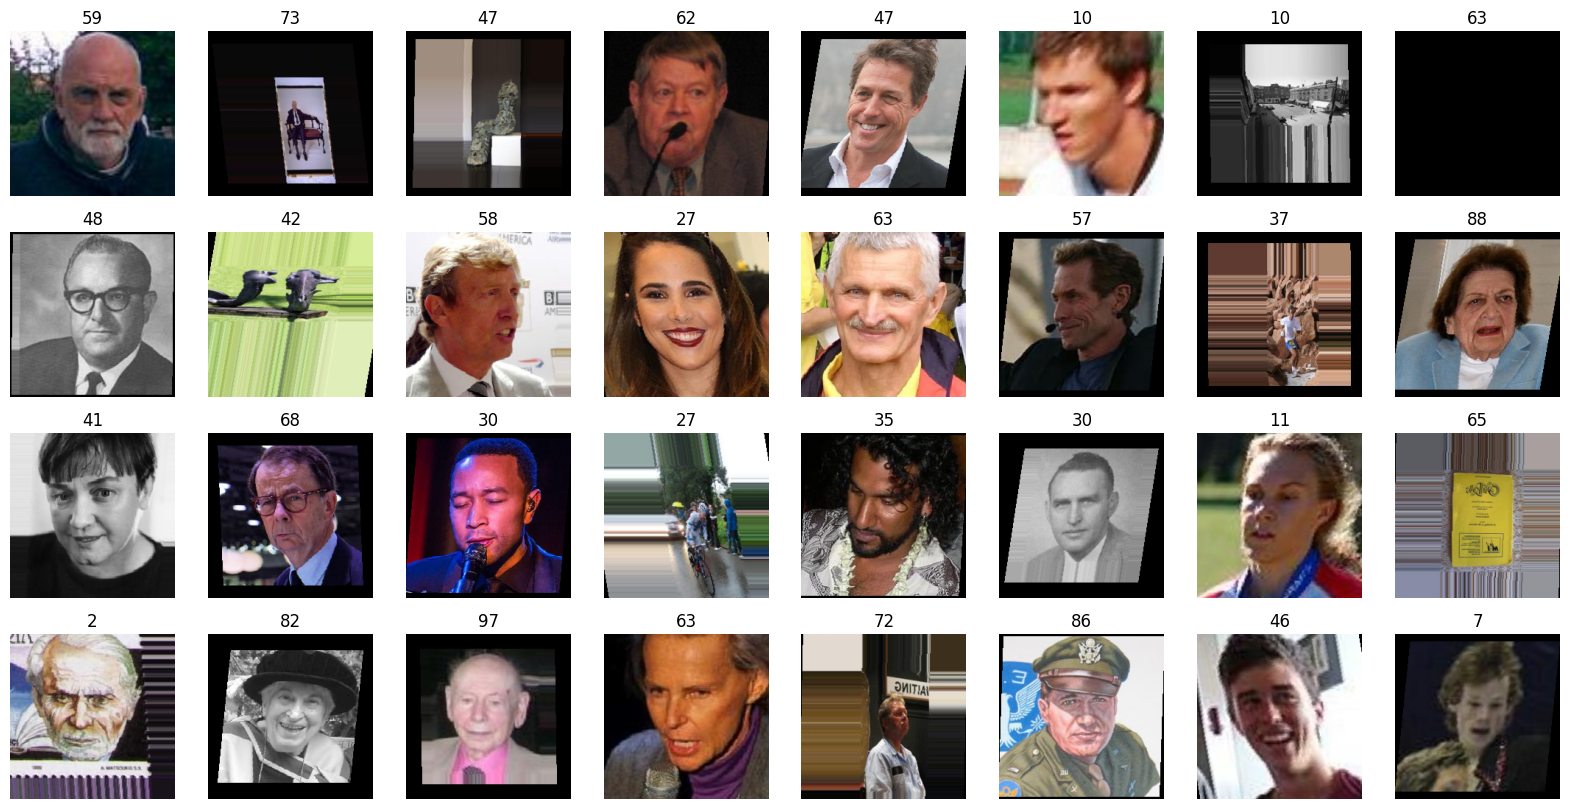

In [ ]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for img, label, ax in zip(imgs, labels, axes.flatten()):
    ax.set_title(label.item())
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')

In [ ]:
# 모델 로드

import torch
import torchvision.models as models

# ResNet 모델 로드
model = models.resnet50(pretrained=True)

# 모델 사용 예시
input_image = torch.randn(1, 3, 224, 224)
predictions = model(input_image)


C:\Users\wlaud\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\wlaud\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters():
    param.requires_grad = False # 가져온 파라미터(W, b)를 업데이트 하지 않는다.

model.fc = nn.Sequential(
    nn.Linear(2048, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 100)
    # 이진이 아니고 다항이기 때문에 sigmoid는 삭제한다.
)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # 모델의 fc 레이어의 파라미터만 최적화
epochs = 100
print(epochs)
for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()  # 모델을 학습 모드로 설정
        else:
            model.eval()  # 모델을 평가 모드로 설정
        sum_losses = 0  # 손실의 합을 0으로 초기화
        sum_accs = 0  # 정확도의 합을 0으로 초기화
        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)  # x_batch는 미니배치
            y_batch = y_batch.to(device)  # y_batch는 미니배치의 레이블
            optimizer.zero_grad()  # 옵티마이저의 그래디언트를 초기화
            with torch.set_grad_enabled(phase == 'train'):
                y_pred = model(x_batch)
                loss = nn.CrossEntropyLoss()(y_pred, y_batch)  # 손실(loss) 계산
                if phase == 'train':
                    loss.backward()  # 손실(loss)을 역전파하여 파라미터를 업데이트
                    optimizer.step()  # 옵티마이저가 가지고 있는 파라미터들을 업데이트
            sum_losses += loss.item() * x_batch.size(0)
            _, y_pred_labels = torch.max(y_pred, 1)
            correct_counts = torch.sum(y_pred_labels == y_batch).item()
            sum_accs += correct_counts
        avg_loss = sum_losses / len(dataloaders[phase].dataset)  # 평균 손실 계산
        avg_acc = sum_accs / len(dataloaders[phase].dataset) * 100  # 평균 정확도 계산
        print(f'{phase:10s}: {epoch+1:4d} / {epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

100


In [ ]:
import os
import shutil

# 경로 설정
train_folder = 'train'
validation_folder = 'validation'

# 나이별 폴더 순회
for age in range(1, 101):
    age_folder = os.path.join(train_folder, str(age))  # 나이별 폴더 경로

    # 나이별 폴더가 존재하는지 확인
    if os.path.isdir(age_folder):
        # validation 폴더에 복사할 폴더 생성
        validation_age_folder = os.path.join(validation_folder, str(age))
        os.makedirs(validation_age_folder, exist_ok=True)

        # 나이별 폴더 내의 파일 리스트 가져오기
        files = os.listdir(age_folder)

        # 상위 3개의 파일만 validation 폴더로 복사
        for file in files[:3]:
            source = os.path.join(age_folder, file)  # 원본 파일 경로
            destination = os.path.join(validation_age_folder, file)  # 복사할 파일 경로
            shutil.copyfile(source, destination)  # 파일 복사
            os.remove(source)  # train 폴더에서 파일 삭제
    else:
        print(f"폴더 {age}가 존재하지 않습니다.")
